In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Loading the Titanic dataset
df = pd.read_csv('../data/titanic.csv')

# Sneak peek at the data
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S


In [3]:
# Printing the shape (rows, columns) of the dataset
print("Shape:", df.shape)

# Displaying column info
df.info()

# Missing values 
print("\nMissing values:\n", df.isnull().sum())

Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687


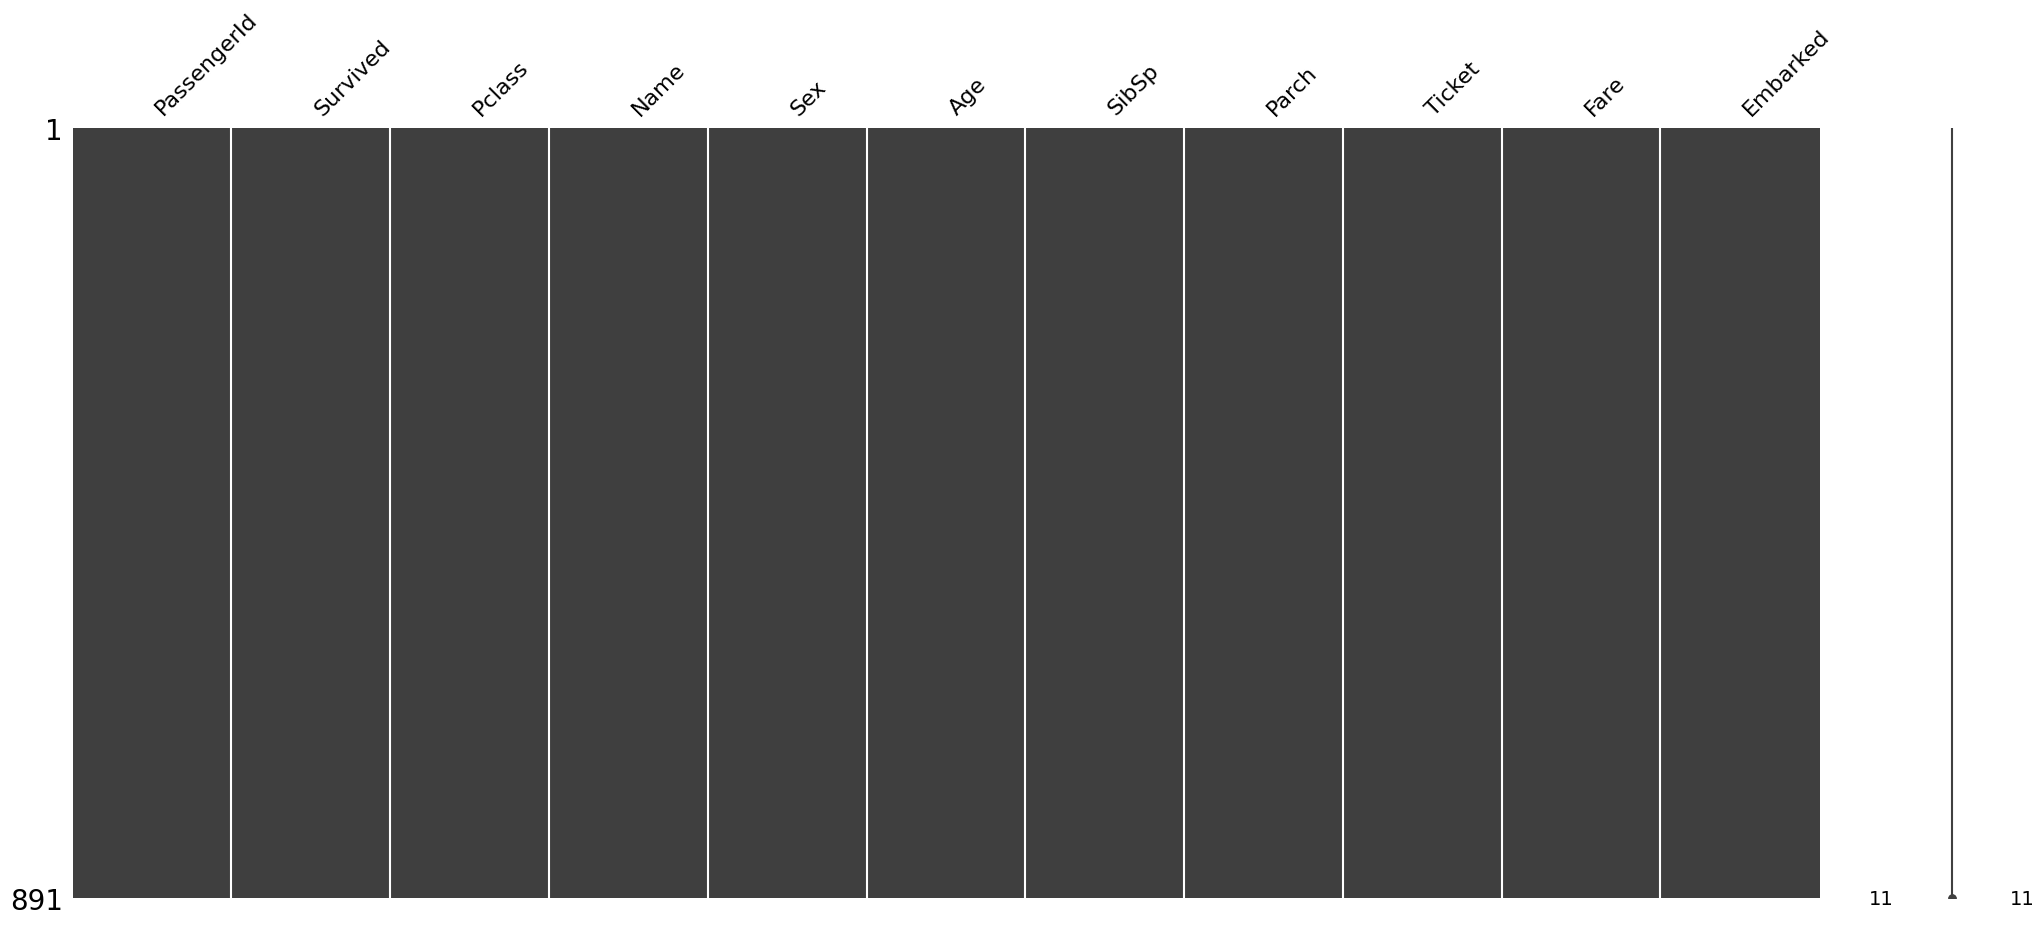

KeyError: "['Cabin'] not found in axis"

In [ ]:
msno.matrix(df)
plt.show()

# Dropping the 'Cabin' column for this analysis due to high number of missing values
df.drop(columns=['Cabin'], inplace=True)

# Filling missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Filling missing values in 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

df.isna().sum()

C:\Users\Rodri\AppData\Local\Temp\ipykernel_8528\820473933.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette=['#e74c3c', '#2ecc71'])


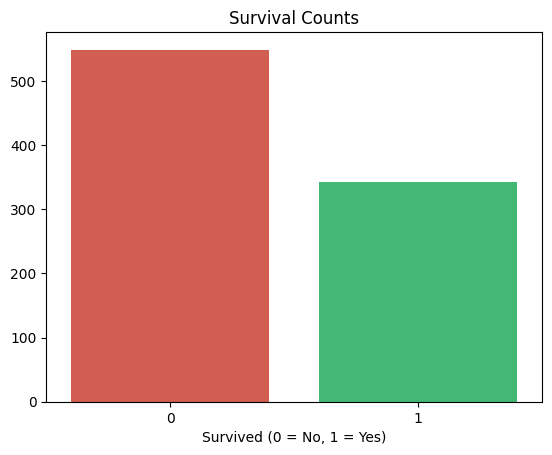

In [ ]:
# Quick look at survival count
sns.countplot(data=df, x='Survived', palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()

Age Summary:
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


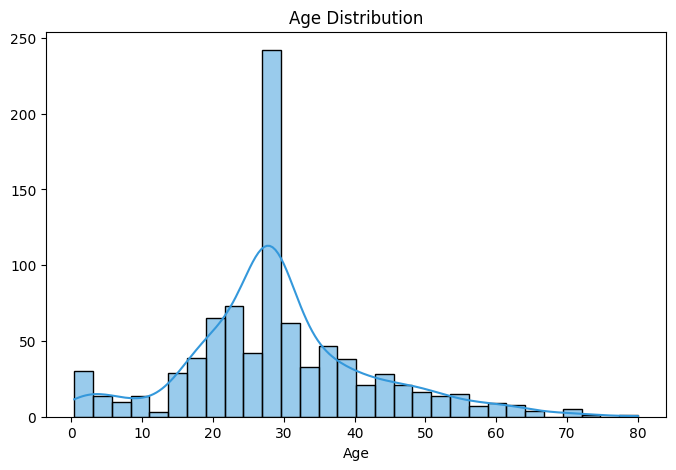


Fare Summary:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


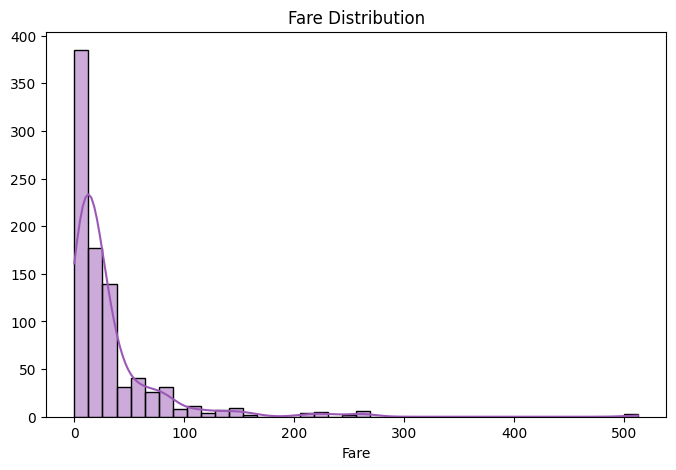

In [ ]:
# Distribution of numerical features - 'Age' and 'Fare'

# Age
print("Age Summary:")
print(df['Age'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='#3498db')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('')
plt.show()

# Fare
print("\nFare Summary:")
print(df['Fare'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True, bins=40, color='#9b59b6')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('')
plt.show()

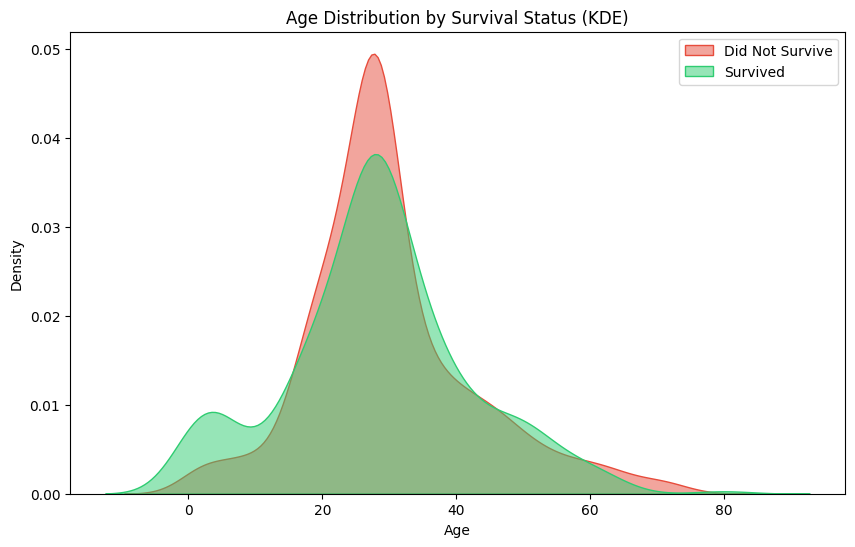

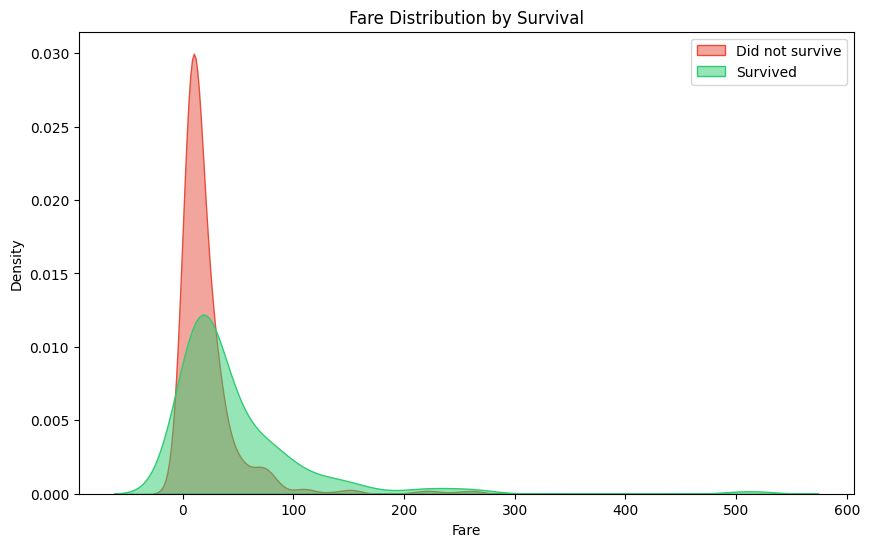

In [10]:
# Survival rate and age distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', fill=True, label='Did Not Survive', color='#e74c3c', alpha=0.5)
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', fill=True, label='Survived', color='#2ecc71', alpha=0.5)
plt.title('Age Distribution by Survival Status (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Survival rate and fare distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Survived'] == 0]['Fare'], label='Did not survive', fill=True, alpha=0.5, color='#e74c3c')
sns.kdeplot(data=df[df['Survived'] == 1]['Fare'], label='Survived', fill=True, alpha=0.5, color='#2ecc71')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
# Correlation with survival
print("\nAge correlation with Survival:")
print(df['Age'].corr(df['Survived']))

print("\nFare correlation with Survival:")
print(df['Fare'].corr(df['Survived']))


Age correlation with Survival:
-0.06491041993052583

Fare correlation with Survival:
0.2573065223849622


In [20]:
# Looking at passenger sex 

# Count passengers by sex
print("Total count of male and female passengers")
sex_counts = df['Sex'].value_counts()
print(sex_counts)
print()

# Survival counts by sex
print("Survival counts by sex:")
survival_by_sex = df.groupby('Sex')['Survived'].value_counts().unstack()
print(survival_by_sex)
print()

# Survival rate by sex
print("Survival rate by sex:")
survival_rate_sex = df.groupby('Sex')['Survived'].mean()
print(survival_rate_sex)
print()

Total count of male and female passengers
Sex
male      577
female    314
Name: count, dtype: int64

Survival counts by sex:
Survived    0    1
Sex               
female     81  233
male      468  109

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64



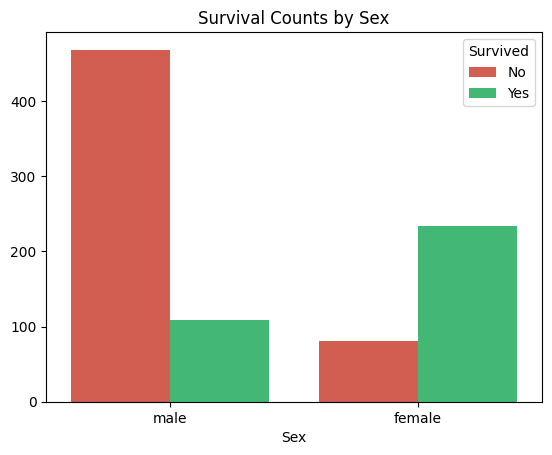

In [25]:
# Visualizing the survival counts by sex
sns.countplot(data=df, x='Sex', hue='Survived', palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Survival rates for children vs adults:
IsChild
False    0.361183
True     0.539823
Name: Survived, dtype: float64


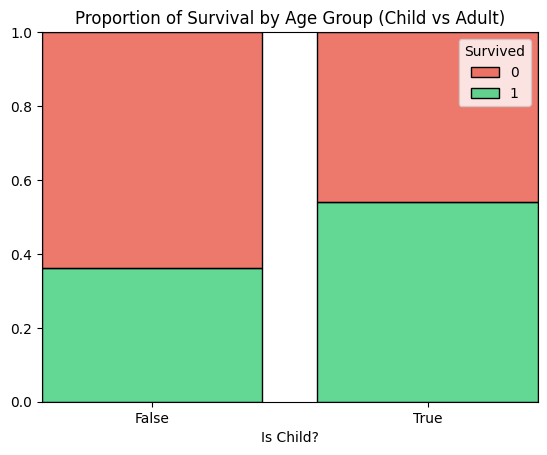

In [ ]:
# Now looking at children/younger passengers specifically - "Woman and children first" policy
df['IsChild'] = df['Age'] < 18

print("Survival rates for children vs adults:")
survival_rates = df.groupby('IsChild')['Survived'].mean()
print(survival_rates)

df['IsChild_str'] = df['IsChild'].astype(str)

sns.histplot(
    data=df,
    x='IsChild_str',
    hue='Survived',
    multiple='fill',
    shrink=0.8,
    palette=['#e74c3c', '#2ecc71']
)

plt.title('Proportion of Survival by Age Group (Child vs Adult)')
plt.xlabel('Is Child?')
plt.ylabel('')
plt.show()

In [ ]:
# Looking at passenger class 

# Count passengers by class
print("Passenger counts by class:")
class_counts = df['Pclass'].value_counts()
print(class_counts)
print()

# Survival counts by class
print("Survival counts by class:")
survival_by_class = df.groupby('Pclass')['Survived'].value_counts().unstack()
print(survival_by_class)
print()

# Survival rate by class
print("Survival rate by class:")
survival_rate_class = df.groupby('Pclass')['Survived'].mean()
print(survival_rate_class)
print()

Total count of 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Survival counts by class:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survival rate by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64



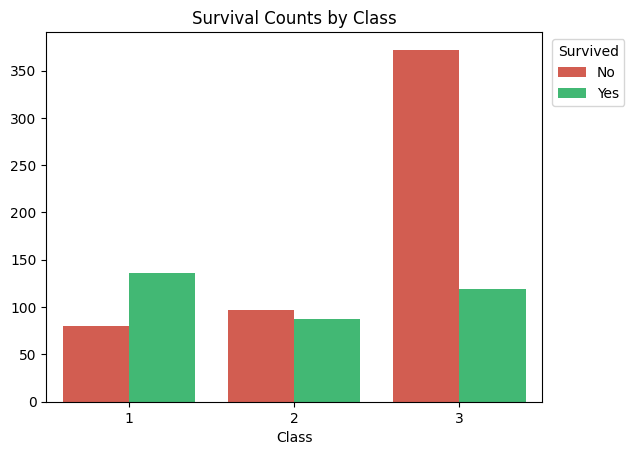

In [7]:
# Visualizing the survival counts by class
sns.countplot(data=df, x='Pclass', hue='Survived', palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Counts by Class')
plt.xlabel('Class')
plt.ylabel('')
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right', bbox_to_anchor=(1.18, 1))
plt.show()
